# Applied Machine Learning HomeWork 1
Due 09/29/21 11:59pm

## Task 1: Data Visualization and Analysis

You can download the FIFA 19 complete dataset from

https://www.kaggle.com/karangadiya/fifa19

Please replace the value of PATH_TO_DATASET variable in the following block with the path to your dataset

In [1]:
# import modules, read data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

## TODO: Replace with the path to your dataset
PATH_TO_DATASET = 'fifa19_data.csv' 
############################################################

df = pd.read_csv(PATH_TO_DATASET, index_col=0)
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [2]:
n = len(df)
m = len(df.columns)
print('Number of examples: {}'.format(n))
print('Number of columns: {}'.format(m))
print(df.columns)
df.count();

Number of examples: 18207
Number of columns: 88
Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Mar

### 1.1 

Create a **scatter plot** of the Age vs Overall Rating. **Ensure the axes are labeled
properly.**

Text(0.5, 1.0, 'Age vs Overall Rating')

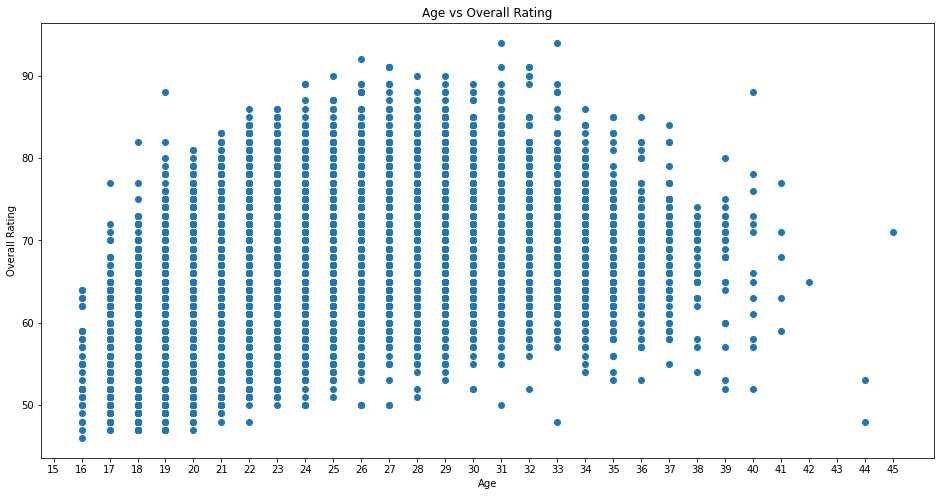

In [3]:
fig = plt.figure(figsize = (16,8))

plt.scatter(df['Age'], df['Overall']);

plt.xticks(np.arange(min(df['Age'])-1, max(df['Age'])+1, 1))
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.title('Age vs Overall Rating')

### 1.2

Visualize the distribution of Overall Rating as a **histogram**. 

Do a small multiples plot of whether the player's prefered foot is left, i.e. do **one plot** of Overall Rating distribution for those players prefered left foot and **a separate** for those who prefer right foot (**within the same figure on separate axes**). **Ensure the axes are labeled properly and titles are added.**

Text(0.5, 1.0, 'Density Histogram for Overall Rating')

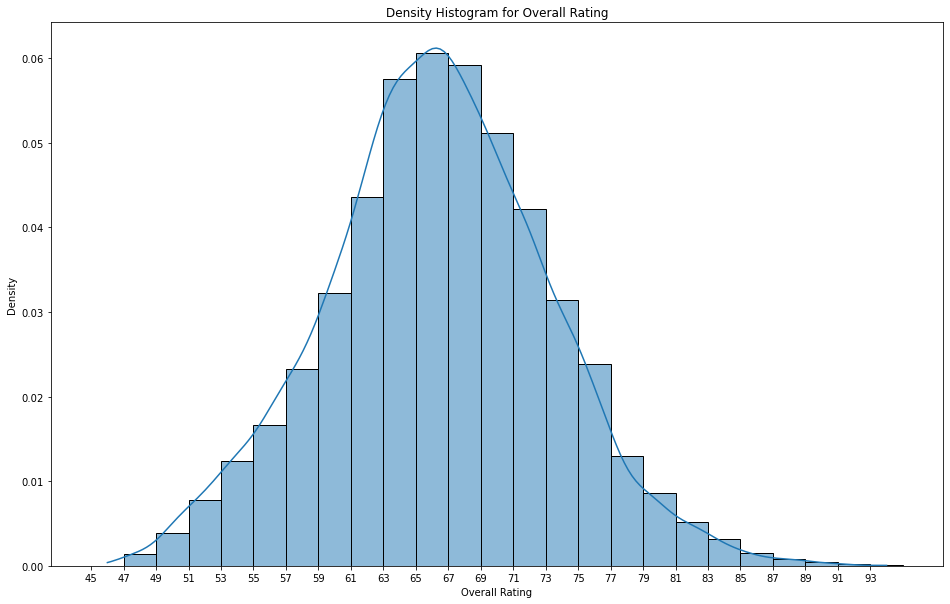

In [4]:
fig = plt.figure(figsize=(16,10))

sns.histplot(df['Overall'], binwidth=2, binrange=(min(df['Overall'])-1, max(df['Overall'])+1), stat='density', kde=True);

plt.xticks(np.arange(min(df['Overall'])-1, max(df['Overall'])+1, 2));
plt.xlabel('Overall Rating');
plt.ylabel('Density');
plt.title('Density Histogram for Overall Rating')

In [5]:
df['Preferred Foot'].value_counts()

Right    13948
Left      4211
Name: Preferred Foot, dtype: int64

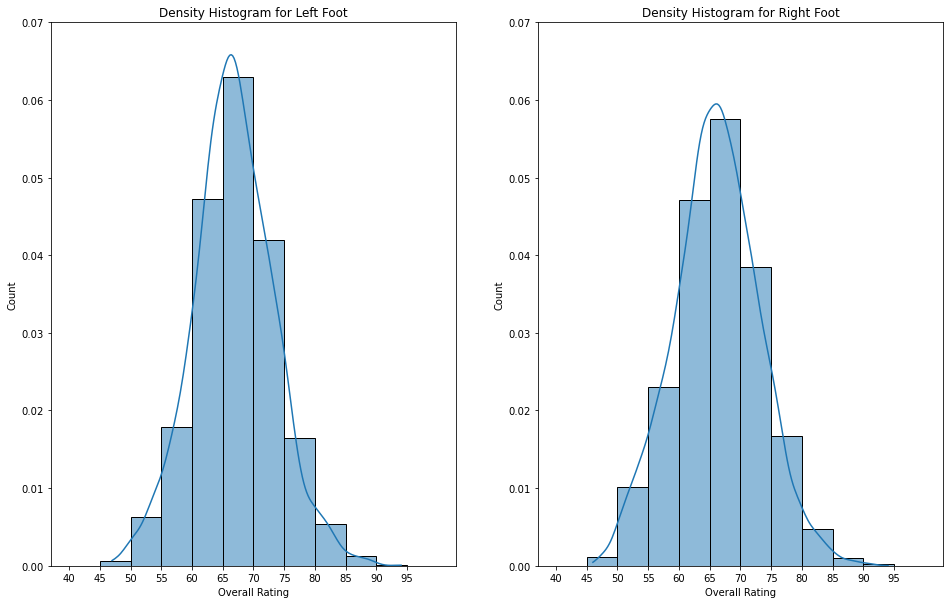

In [6]:
left = df[df['Preferred Foot'] == 'Left']['Overall']
right = df[df['Preferred Foot'] == 'Right']['Overall']

fig, axes = plt.subplots(1, 2, figsize=(16,10))
axes[0].set_title('Density Histogram for Left Foot')
axes[1].set_title('Density Histogram for Right Foot')

sns.histplot(left, binwidth=5, binrange=(40, 100) , alpha=0.5, kde=True, stat='density', ax=axes[0]);
sns.histplot(right, binwidth=5, binrange=(40, 100), alpha=0.5, kde=True, stat='density', ax=axes[1]);


axes[0].set(xlabel='Overall Rating', ylabel='Count');
axes[1].set(xlabel='Overall Rating', ylabel='Count');
axes[0].set_xticks(np.arange(40, 100, 5));
axes[1].set_xticks(np.arange(40, 100, 5));
axes[0].set_yticks(np.arange(0, 0.08, 0.01));
axes[1].set_yticks(np.arange(0, 0.08, 0.01));

Can you spot differences in the distributions?

Answer: Density curve for left-footed players has a higher peak and lesser standard deviation than that of right-footed players. 


If we pick a left-footed player at random, it is more likely for them to have a overall rating bewteen 65 and 70 as compared to the case if we pick a right-footed player. Density curve for the overall ratings of left-footed players has a higher peek than that of those who are right-footed.

### 1.3

Create a **pie chart** for distribution of Weak Foot for all the players. Get rid of players whose Weak Foot = nan. **Ensure each division is labeled properly and title is added**

In [7]:
df['Weak Foot'].unique()

array([ 4.,  5.,  3.,  2.,  1., nan])

In [8]:
df['Weak Foot'].isna().sum()

48

In [9]:
weak_foot = df['Weak Foot'].dropna()
weak_foot.isnull().values.sum()

0

In [10]:
weak_foot.value_counts()

3.0    11349
2.0     3761
4.0     2662
5.0      229
1.0      158
Name: Weak Foot, dtype: int64

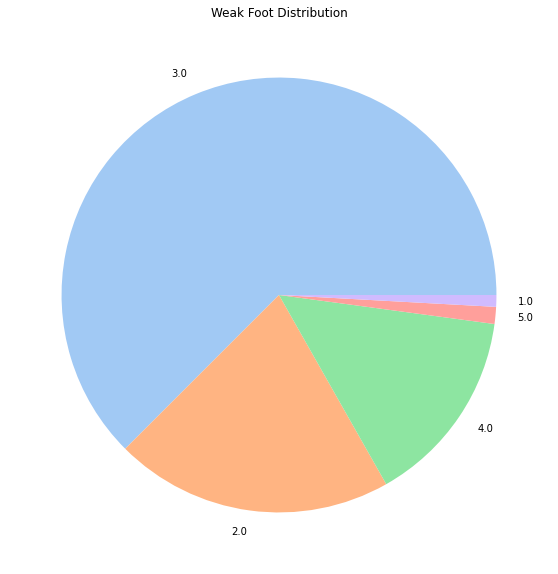

In [11]:
fig = plt.figure(figsize=(16,10))
colors = sns.color_palette('pastel')[0:6]
plt.pie(weak_foot.value_counts().values, labels=np.array(weak_foot.value_counts().index), colors=colors);
plt.title('Weak Foot Distribution');

### 1.4 

Create **a boxplot and a violin plot** for distributions of players' ages in different positions (similar to plots on page 92 of Lecture 1 slide) Get rid of players whose position = nan. **Ensure the axes are labeled properly**

In [12]:
df['Position'].value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
RAM      21
LAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [13]:
df['Position'].isna().sum()

60

In [14]:
position_age_df = df.dropna(how='any', subset=['Position'])
position_age_df = position_age_df[['Position', 'Age']]
position_age_df['Position'].isna().sum()

0

In [15]:
position_age_df.head()

,Position,Age
0,RF,31
1,ST,33
2,LW,26
3,GK,27
4,RCM,27


In [16]:
ordr = position_age_df.groupby(by=['Position'])['Age'].median().sort_values().index
ordr

Index(['CM', 'RW', 'CF', 'LW', 'CAM', 'RM', 'LM', 'ST', 'CB', 'RB', 'CDM',
       'RWB', 'GK', 'LWB', 'LB', 'LCM', 'RS', 'RCM', 'RF', 'RDM', 'LCB', 'LF',
       'LDM', 'RCB', 'LS', 'RAM', 'LAM'],
      dtype='object', name='Position')

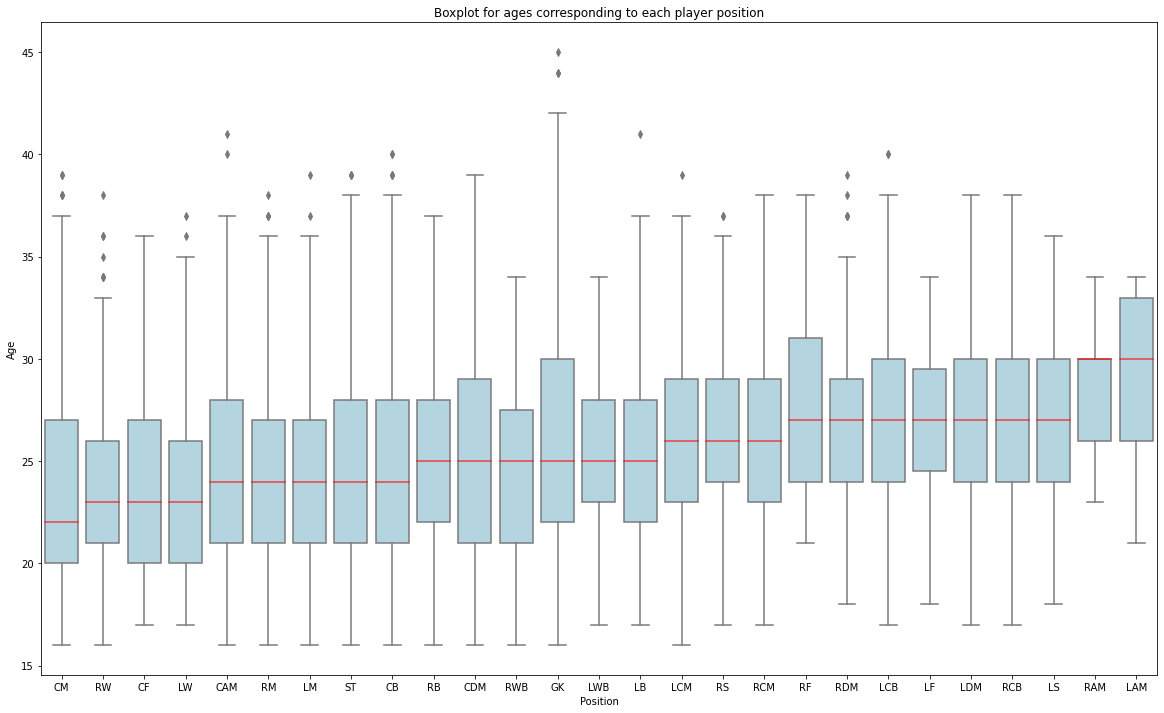

In [17]:
fig = plt.figure(figsize=(20,12))

sns.boxplot(
    x=position_age_df['Position'], 
    y=df['Age'], 
    order=ordr, 
    medianprops=dict(color="red", alpha=0.7), 
    color='lightblue');

plt.yticks(np.arange(min(df['Age'])-1, max(df['Age'])+1, 5))
plt.xlabel('Position')
plt.ylabel('Age')
plt.title('Boxplot for ages corresponding to each player position');

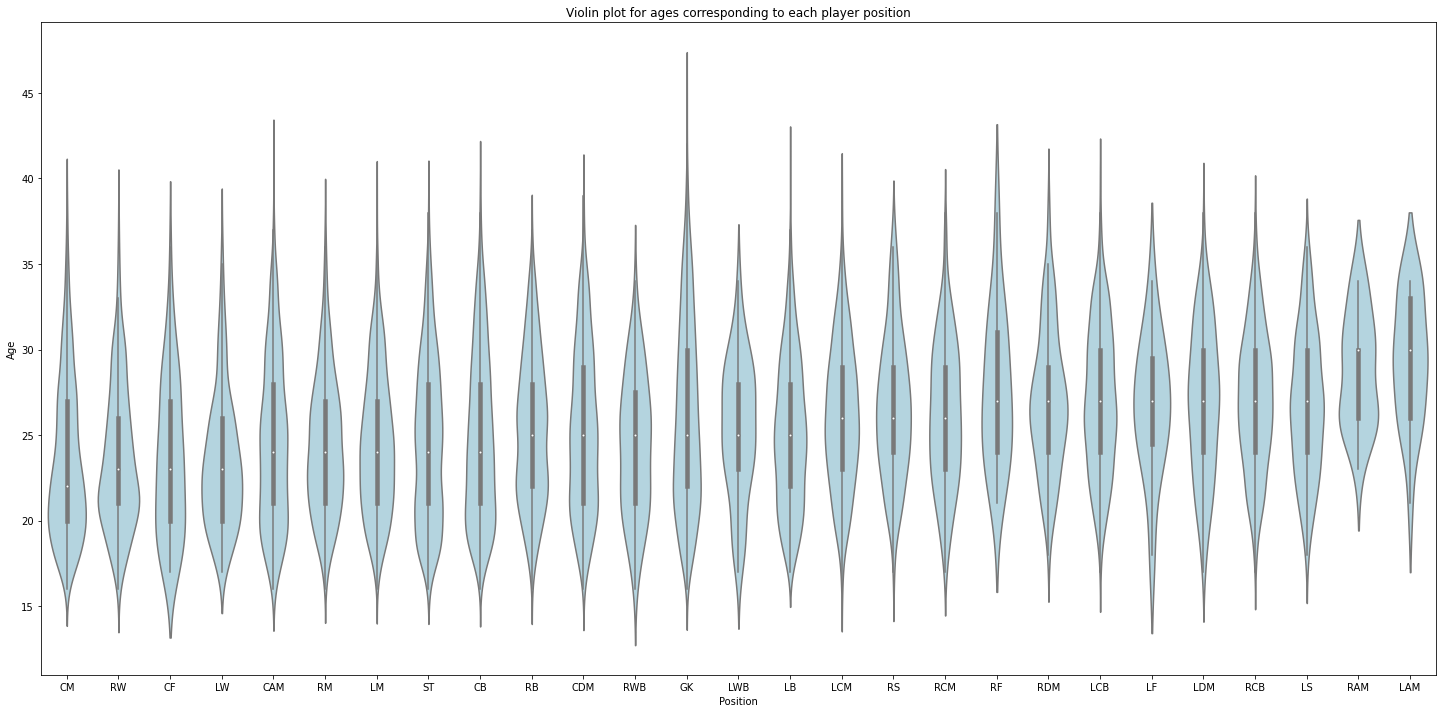

In [18]:
fig = plt.figure(figsize=(25,12))

sns.violinplot(x=position_age_df['Position'], y=df['Age'], 
            color='lightblue', order=ordr);

plt.yticks(np.arange(min(df['Age'])-1, max(df['Age'])+1, 5))
plt.xlabel('Position')
plt.ylabel('Age')
plt.title('Violin plot for ages corresponding to each player position');

# Order it

### 1.5
Creat a **stacked bar plot** for proportions of international reputation vs. players' ages (similar to the plot on page 97 of lecture 1 slide). **Ensure the axes and bars are labeled properly**

Note that international reputation takes value from [1,2,3,4,5]. Get rid of players whose international reputation is nan. 

Ages should be treated as intervals with width 5, i.e. the x-axis labels should be: 16 to 20, 21 to 25, 26 to 30,..., 41 to 45 

In [19]:
df['International Reputation'].value_counts()

1.0    16532
2.0     1261
3.0      309
4.0       51
5.0        6
Name: International Reputation, dtype: int64

In [20]:
df['International Reputation'].isna().sum()

48

In [21]:
intlrep_age_df = df.dropna(how='any', subset=['International Reputation'])
intlrep_age_df = intlrep_age_df[['International Reputation', 'Age']]

bins = [v for v in range(min(df['Age'])-1, max(df['Age'])+1, 5)] # for binning ages
labels = [f"{age+1}-{age+5}" for age in bins[:-1]] # labels for age ranges

# add column indicating age range
intlrep_age_df['age_range'] = pd.cut(intlrep_age_df.Age, bins, labels=labels, right=True, include_lowest=True)

intlrep_age_df.head()

,International Reputation,Age,age_range
0,5.0,31,31-35
1,5.0,33,31-35
2,5.0,26,26-30
3,4.0,27,26-30
4,4.0,27,26-30


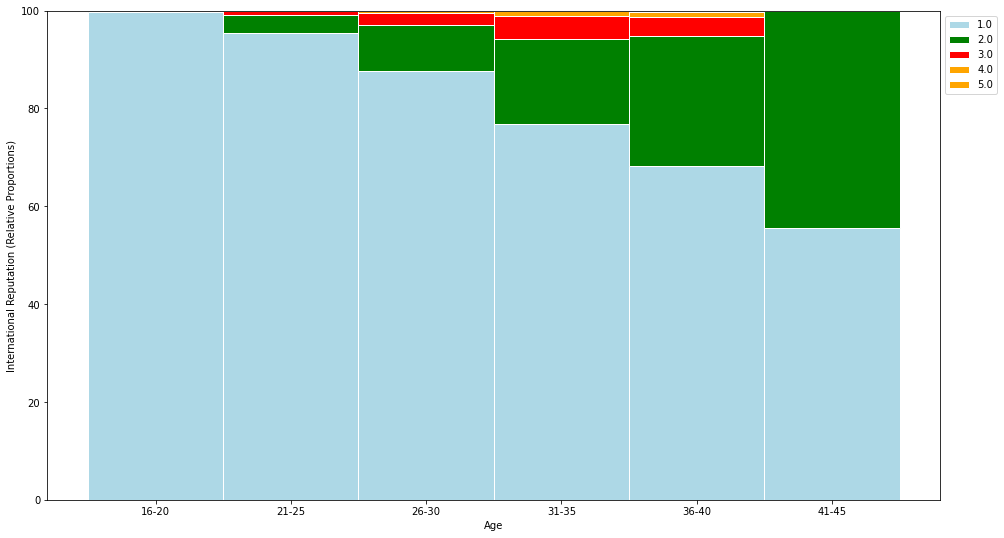

In [22]:
# group by age_range and International Reputation with aggregate function count(Age)
intlrep_age_df = intlrep_age_df.groupby(['age_range', 'International Reputation']).Age.count().unstack()

# convert to relative proportions
count = [(i_1+i_2+i_3+i_4+i_5) for (i_1,i_2,i_3,i_4,i_5) in list(zip(intlrep_age_df[1.0], intlrep_age_df[2.0], intlrep_age_df[3.0], intlrep_age_df[4.0], intlrep_age_df[5.0]))]
rep = [[] for _ in range(0, 5)]
for idx in range(0, 5):
    rep[idx] = [((i / j) * 100) for (i,j) in list(zip(intlrep_age_df[float(idx+1)], count))]

    
# begin stacked bar plot
plt.figure(figsize=(16,9))
n_bars = [1, 2, 3, 4, 5, 6]

# stack bars
plt.bar(n_bars, rep[0], color='lightblue', edgecolor='white', width=1.0, label='1.0')
plt.bar(n_bars, rep[1], bottom=rep[0], color='green', edgecolor='white', width=1.0, label='2.0')
plt.bar(n_bars, rep[2], bottom=[i_1+i_2 for (i_1,i_2) in list(zip(rep[0], rep[1]))], color='red', edgecolor='white', width=1.0, label='3.0')
plt.bar(n_bars, rep[3], bottom=[i_1+i_2+i_3 for (i_1,i_2,i_3) in list(zip(rep[0], rep[1], rep[2]))], color='orange', edgecolor='white', width=1.0, label='4.0')
plt.bar(n_bars, rep[4], bottom=[i_1+i_2+i_3+i_4 for (i_1,i_2,i_3,i_4) in list(zip(rep[0], rep[1], rep[2], rep[3]))], color='orange', edgecolor='white', width=1.0, label='5.0')
 
plt.xticks(n_bars, labels)
plt.xlabel('Age')
plt.ylabel('International Reputation (Relative Proportions)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1);

## Task 2: Data Preprocessing and Supervised Learning

Use the dataset_credit.csv for this task. The target variable is 'class'.

### 2.1

Load the data and understand the data distributions - pick a few features and plot their distributions.


In [23]:
# load the dataset
df = pd.read_csv('dataset_credit.csv')
df.head()

,duration,credit_amount,savings_status,employment,property_magnitude,age,own_telephone,class
0,6,1169.0,'no known savings','>=7','real estate',67,NaN,good
1,48,5951.0,'<100','1<=X<4','real estate',22,NaN,bad
2,12,2096.0,'<100','4<=X<7','real estate',49,NaN,good
3,42,7882.0,'<100','4<=X<7','life insurance',45,none,good
4,24,4870.0,'<100','1<=X<4','no known property',53,NaN,bad


In [24]:
df.columns;

In [25]:
# number of target classes present
df['class'].value_counts()

good    700
bad     300
Name: class, dtype: int64

In [26]:
f"Total number of examples: {len(df.index)}"

'Total number of examples: 1000'

In [27]:
# data types for columns
df.dtypes

duration                int64
credit_amount         float64
savings_status         object
employment             object
property_magnitude     object
age                     int64
own_telephone          object
class                  object
dtype: object

In [28]:
# check missing values
df.count()

duration              1000
credit_amount          926
savings_status        1000
employment            1000
property_magnitude    1000
age                   1000
own_telephone          241
class                 1000
dtype: int64

## 'duration'

In [29]:
# data type
df['duration'].dtype

dtype('int64')

In [30]:
# number of missing values
df['duration'].isna().sum()

0

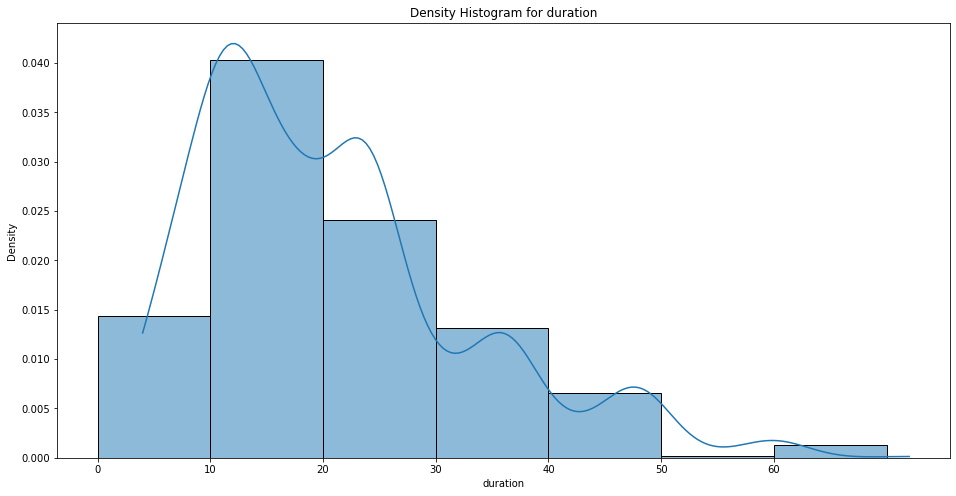

In [31]:
# density histogram
plt.figure(figsize=(16,8))

sns.histplot(df['duration'], stat='density', binwidth=10, binrange=(0, 70), kde=True)

plt.xticks(ticks=np.arange(0, 70, 10))
plt.xlabel('duration')
plt.ylabel('Density')
plt.title('Density Histogram for duration');

### From above histogram, there seems to be presence of outliers. We'll confirm this using a boxplot

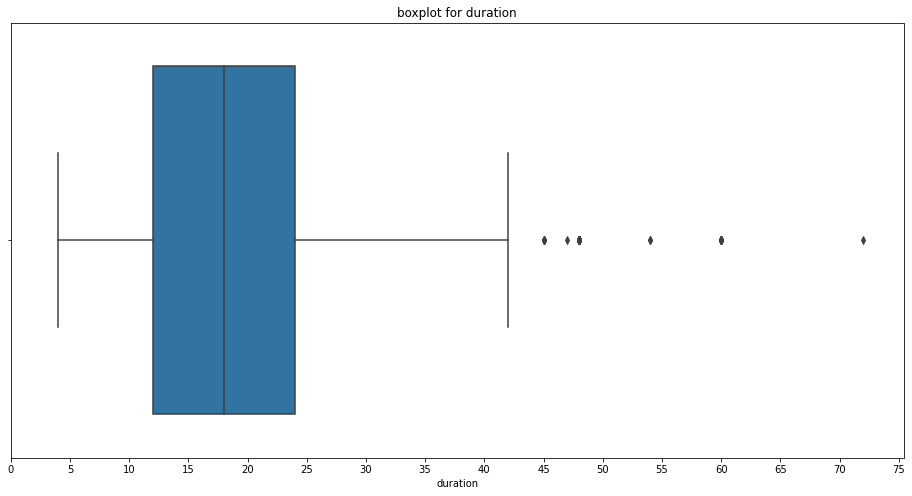

In [32]:
# boxplot
plt.figure(figsize=(16,8))

sns.boxplot(x=df['duration'], orient='h')

plt.xticks(np.arange(0, 80, 5))
plt.xlabel('duration')
plt.title('boxplot for duration');

### We can see presence of outliers from above

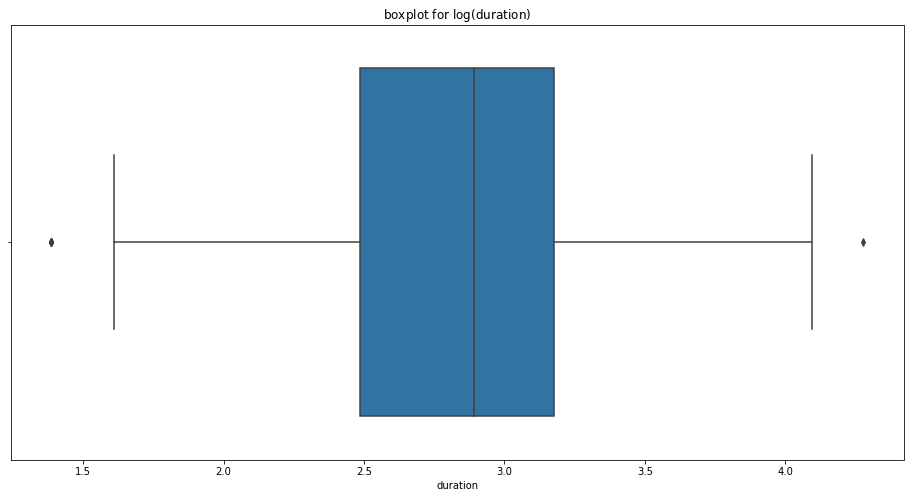

In [33]:
# boxplot with log transformation
plt.figure(figsize=(16,8))

sns.boxplot(x=np.log(df['duration']), orient='h')

plt.xlabel('duration')
plt.title('boxplot for $\log$(duration)');

### This way, we get rid of outliers (almost)

## 'credit_amount'

In [34]:
# data type
df['credit_amount'].dtype

dtype('float64')

In [35]:
# number of missing values
df['credit_amount'].isna().sum()

74

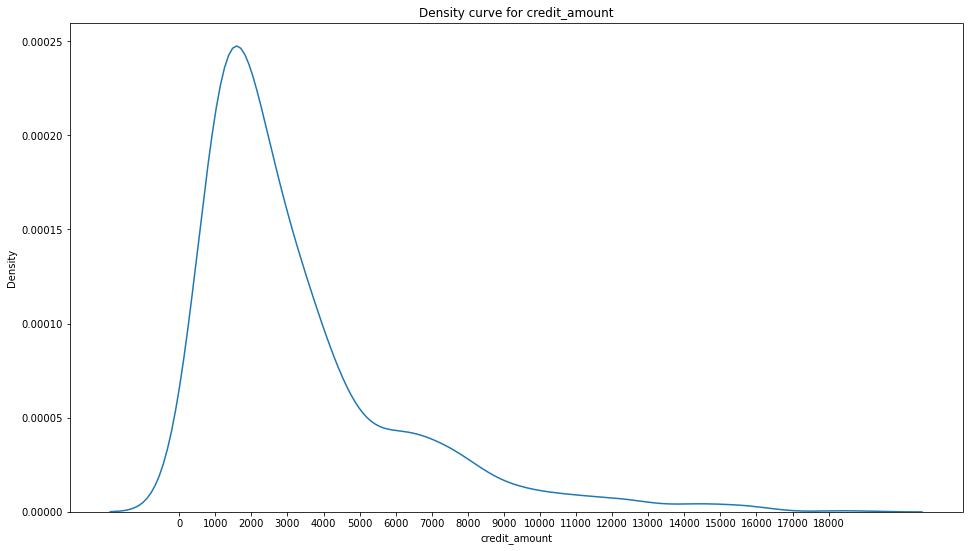

In [36]:
# density curve

plt.figure(figsize=(16,9))

sns.kdeplot(df['credit_amount'])

plt.xticks(ticks=np.arange(0, df['credit_amount'].max()+1, 1000))
plt.xlabel('credit_amount')
plt.ylabel('Density')
plt.title('Density curve for credit_amount');

### From above, it looks like lognormal

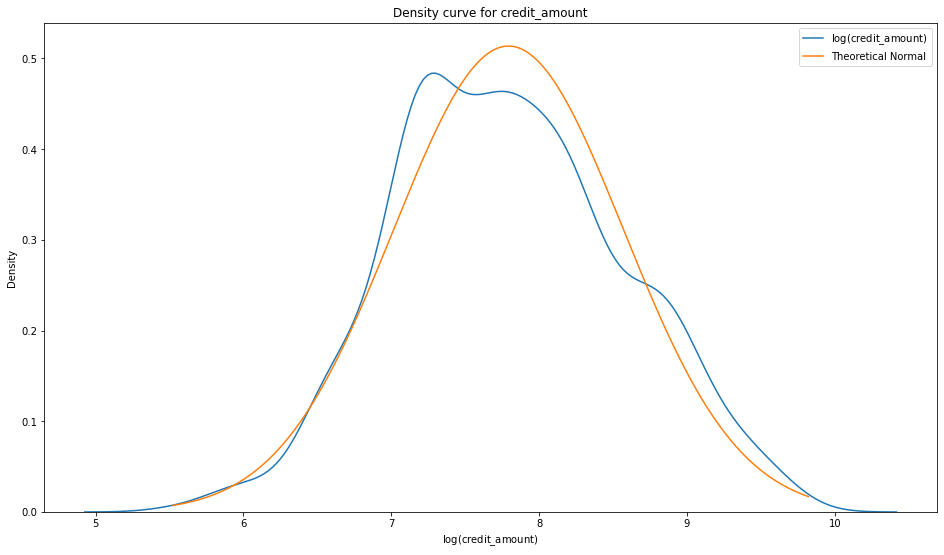

In [37]:
# log('credit_amount') density curve

plt.figure(figsize=(16,9))

log_credit_amount = np.log(df['credit_amount'])
sns.kdeplot(log_credit_amount, label='$\log$(credit_amount)')

mu = np.mean(log_credit_amount)
sigma = np.std(log_credit_amount)

x_axis = np.linspace(log_credit_amount.min(), log_credit_amount.max(), 10000)
plt.plot(x_axis, stats.norm.pdf(x_axis, mu, sigma), label='Theoretical Normal')

plt.xlabel('$\log$(credit_amount)')
plt.ylabel('Density')
plt.title('Density curve for credit_amount');
plt.legend();


### This looks like normal now

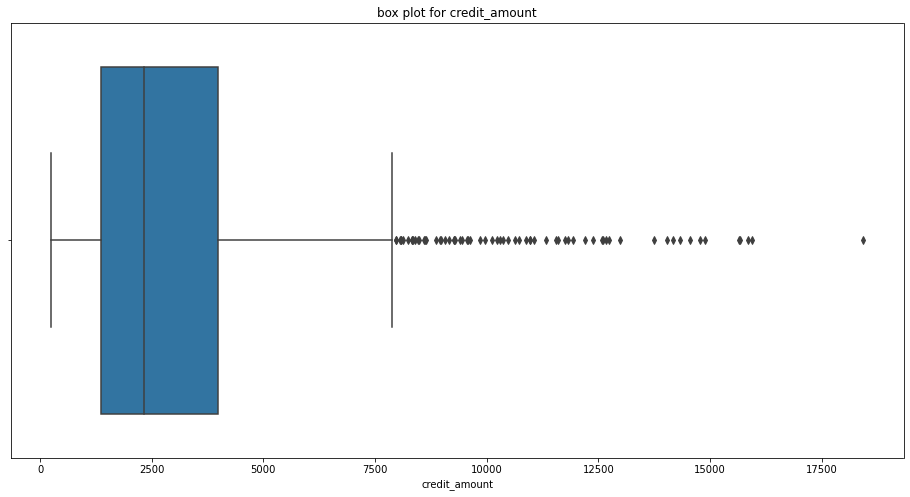

In [38]:
# boxplot 
plt.figure(figsize=(16,8))

sns.boxplot(x=df['credit_amount'], orient='h')

plt.xlabel('credit_amount')
plt.title('box plot for credit_amount');

### We see so many outliers above

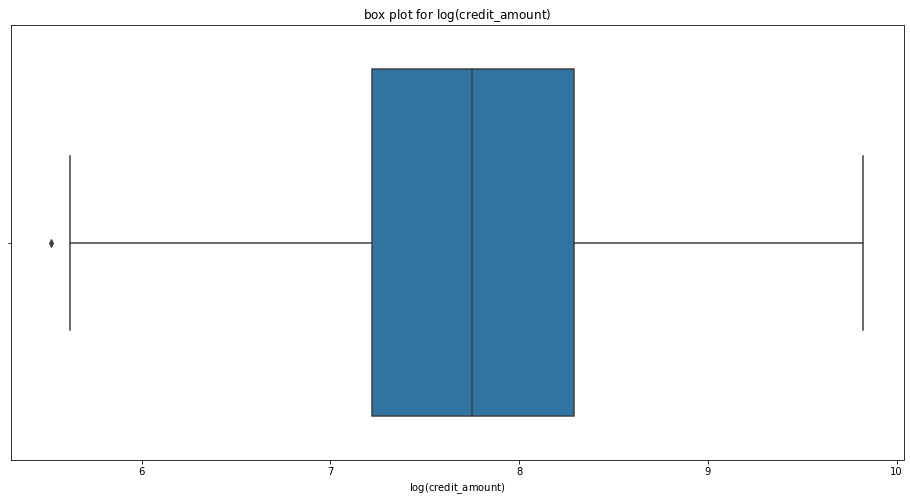

In [39]:
# boxplot for 'log(credit_amount)'
plt.figure(figsize=(16,8))

sns.boxplot(x=np.log(df['credit_amount']), orient='h')

plt.xlabel('$\log$(credit_amount)')
plt.title('box plot for $\log$(credit_amount)');

### Taking log, we get rid of outliers (almost)

## 'savings_status'

In [40]:
df['savings_status'].dtype

dtype('O')

In [41]:
# number of missing values
df['savings_status'].isna().sum()

0

In [42]:
df['savings_status'].value_counts()

'<100'                603
'no known savings'    183
'100<=X<500'          103
'500<=X<1000'          63
'>=1000'               48
Name: savings_status, dtype: int64

In [43]:
df['savings_status'].value_counts().values;
df['savings_status'].value_counts().index;

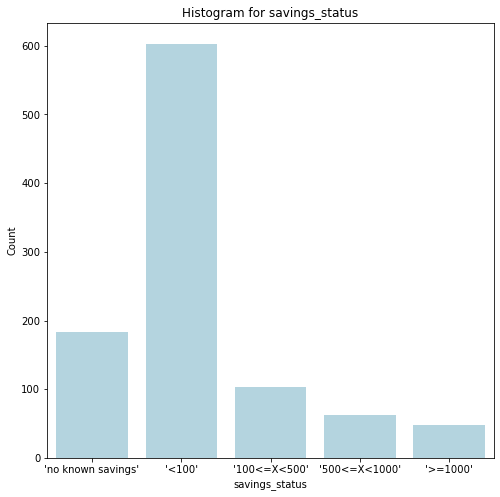

In [44]:
# histogram
plt.figure(figsize=(8,8))

sns.countplot(x=df['savings_status'], 
              order=["'no known savings'", "'<100'", "'100<=X<500'", "'500<=X<1000'", "'>=1000'"], 
              color='lightblue');

plt.xlabel('savings_status')
plt.ylabel('Count')
plt.title('Histogram for savings_status');

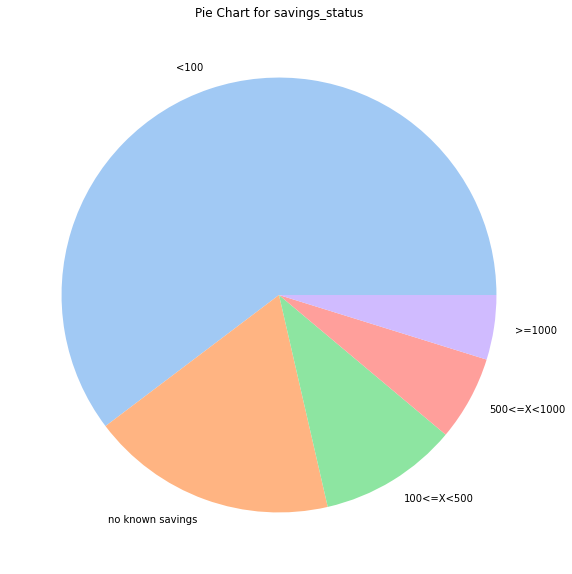

In [45]:
# pie chart
plt.figure(figsize=(16,10))

colors = sns.color_palette('pastel')[0:6]
plt.pie(df['savings_status'].value_counts().values, 
        labels=['<100', 'no known savings', '100<=X<500', '500<=X<1000', '>=1000'], colors=colors);

plt.title('Pie Chart for savings_status');

## 'employement'

In [46]:
df['employment'].dtype

dtype('O')

In [47]:
df['employment'].isna().sum()

0

In [48]:
df['employment'].value_counts()

'1<=X<4'      339
'>=7'         253
'4<=X<7'      174
'<1'          172
unemployed     62
Name: employment, dtype: int64

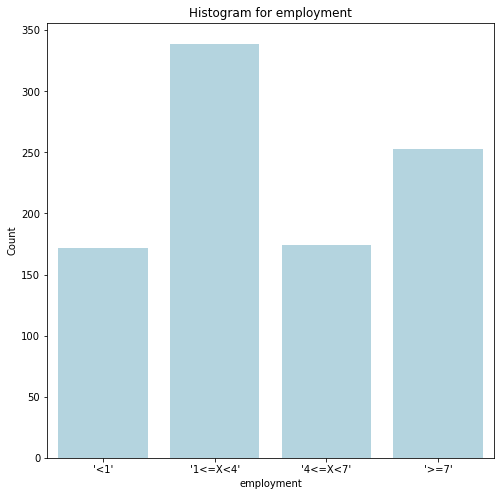

In [49]:
# histogram
plt.figure(figsize=(8,8))

sns.countplot(x=df['employment'], 
              order=["'<1'", "'1<=X<4'", "'4<=X<7'", "'>=7'"], 
              color='lightblue');


plt.xlabel('employment')
plt.ylabel('Count')
plt.title('Histogram for employment');

# 'property_magnitude'

In [50]:
df['property_magnitude'].value_counts()

car                    332
'real estate'          282
'life insurance'       232
'no known property'    154
Name: property_magnitude, dtype: int64

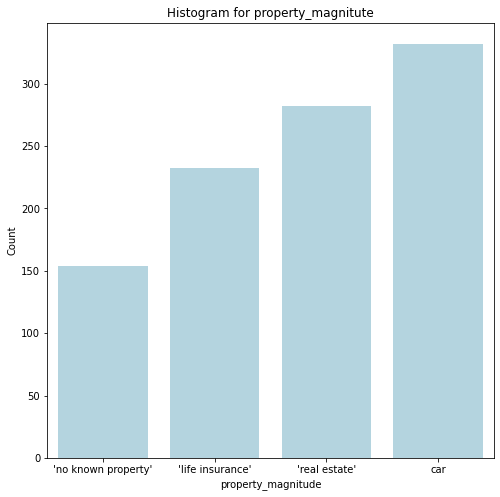

In [51]:
# density histogram
plt.figure(figsize=(8,8))

sns.countplot(x=df['property_magnitude'], 
              order=["'no known property'", "'life insurance'", "'real estate'", "car"], 
              color='lightblue');

plt.xlabel('property_magnitude')
plt.ylabel('Count')
plt.title('Histogram for property_magnitute');

## 'age'

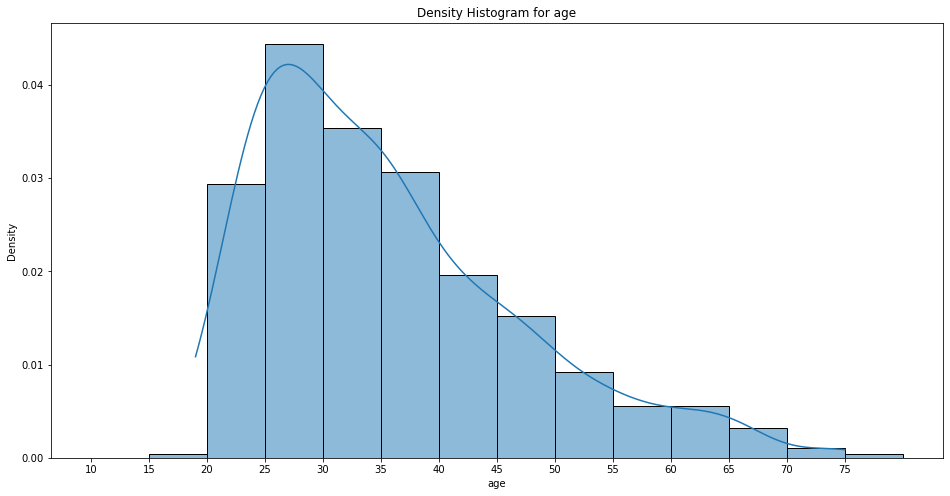

In [52]:
# density histogram
plt.figure(figsize=(16,8))

sns.histplot(df['age'], stat='density', binwidth=5, binrange=(10, 80), kde=True)

plt.xticks(ticks=np.arange(10, 80, 5))
plt.xlabel('age')
plt.ylabel('Density')
plt.title('Density Histogram for age');

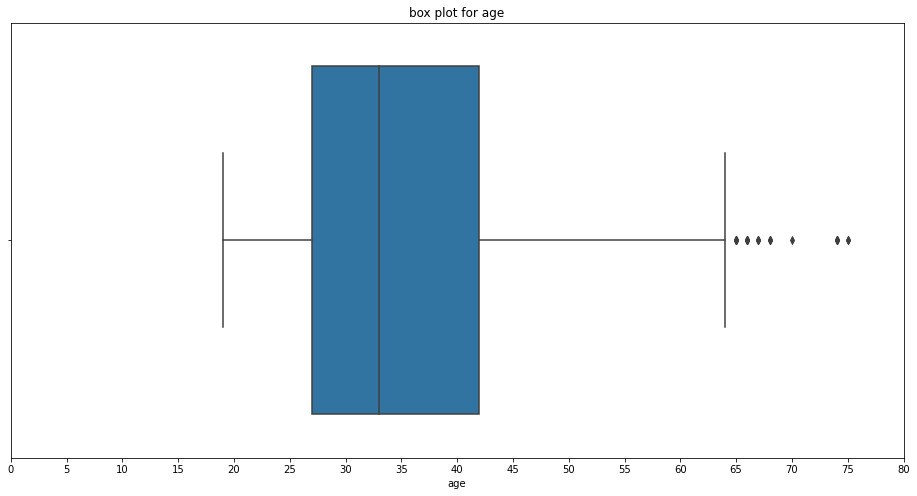

In [53]:
# boxplot
plt.figure(figsize=(16,8))

sns.boxplot(x=df['age'], orient='h')

plt.xticks(np.arange(0, 85, 5))
plt.xlabel('age')
plt.title('box plot for age');

### Outliers are present in 'age'

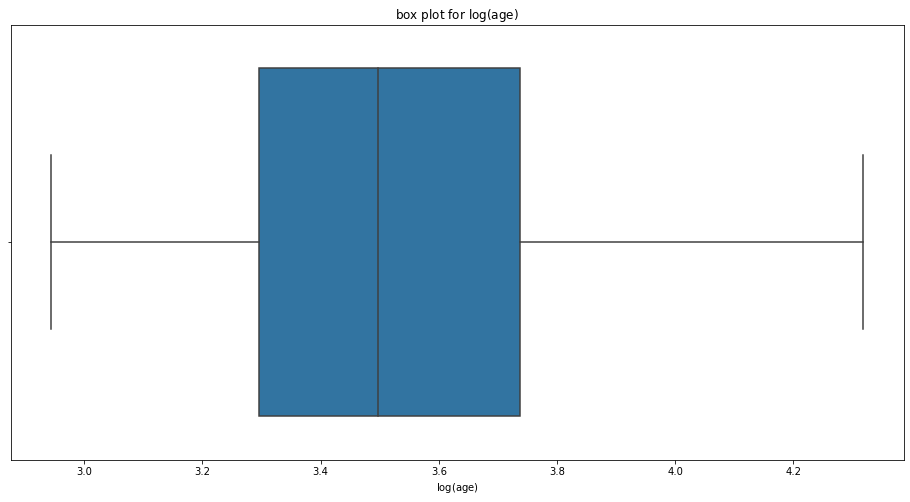

In [54]:
# box plot for log(age)
plt.figure(figsize=(16,8))

sns.boxplot(x=np.log(df['age']), orient='h')

plt.xlabel('$\log$(age)')
plt.title('box plot for $\log$(age)');

### This way, we get rid of outliers

## 'own_telephone'

In [55]:
f"We see that {(df['own_telephone'].isna().sum()/len(df.index))*100}% values of the feature 'own_telephone' are missing. We won't explore this feature as it is likely to get dropped during preprocessing"

"We see that 75.9% values of the feature 'own_telephone' are missing. We won't explore this feature as it is likely to get dropped during preprocessing"

### 2.2

**Preprocessing** - does any feature need pre-processing? Would you do any scaling to numerical features? Are there any categorical features? How would you handle the categorical features? Are there any features that has missing values? What % of values are missing in each of the features? Based on this percentages, would you consider dropping any features? How about adding a missing indicator? Would you consider adding a missing indicator column?

#### We have already explored our data above. Now we suggest possible preprocessing techniques based on that. 

### Note that we will not perform preprocessing here itself as we've not yet train_test split our data. Only the techniques will be discussed here but actual preprocessing will take place through scikit-learn pipeline below

In [56]:
df.columns

Index(['duration', 'credit_amount', 'savings_status', 'employment',
       'property_magnitude', 'age', 'own_telephone', 'class'],
      dtype='object')

### numerical features

'duration', 'credit_amount', 'age' are the numerical features in our dataset. All of these need to be preprocessed because they are all on different scales and contain outliers. From exploratory data analysis above, we were able to get rid of outliers using log transform. So, I'm going to follow the following strategy for these numerical features:

#### take log transform ---> standardize using new mean and std ---> fill missing values with new median 

Note: Imputation will take place only in case of 'credit_amount' where some values are missing

### categorical features

'savings_status', 'employment', 'property_magnitude', 'own_telephone' are the categorical features in our dataset, with 'savings_status' and 'employment' having ordinal categories. We leave 'own_telephone' out of this discussion for now.

All the remaining ones will need preprocessing as they have to pass through sklearn's pipeline

I would consider the following strategy:

#### 'property_magnitude' ---> One Hot Encoding ...and... ['savings_status', 'employment'] ---> Ordinal Encoding


There is no need of imputation as these features have no missing values

### Handling missing values

In [57]:
df.count()

duration              1000
credit_amount          926
savings_status        1000
employment            1000
property_magnitude    1000
age                   1000
own_telephone          241
class                 1000
dtype: int64

#### We see that only features with missing values are 'credit_amount' and 'own_telephone' 

In [58]:
f"credit_amount has {round((df['credit_amount'].isna().sum()/len(df.index))*100, 1)}% values missing and 'own_telephone' has {(df['own_telephone'].isna().sum()/len(df.index))*100}% values missing"

"credit_amount has 7.4% values missing and 'own_telephone' has 75.9% values missing"

#### It is very likely that 'own_telephone' will contain a lot of missing values even after train_test split, so it is better to get rid of this feaute in preprocessing

#### We have already discussed above how to handle missing values in 'credit_amount'

### Let's start building models now

### 2.3

**Data splitting** - Create development & test datasets.

In [59]:
# load the dataset 
df = pd.read_csv('dataset_credit.csv')

# assign target column
y = df['class']

# Assign 0 to 'good', 1 to 'bad'.
# Note: this does not cause data leakage as we know apriori that this is a binary classification problem
# with classes 'good' and 'bad'
y = np.where(y=='good', 0, 1)

# drop target column 
X = df.drop(['class'], axis=1)

X.head()

,duration,credit_amount,savings_status,employment,property_magnitude,age,own_telephone
0,6,1169.0,'no known savings','>=7','real estate',67,NaN
1,48,5951.0,'<100','1<=X<4','real estate',22,NaN
2,12,2096.0,'<100','4<=X<7','real estate',49,NaN
3,42,7882.0,'<100','4<=X<7','life insurance',45,none
4,24,4870.0,'<100','1<=X<4','no known property',53,NaN


In [60]:
y[0:10]

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [61]:
# stratified train_test split
from sklearn.model_selection import train_test_split

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=42)

Give a reason on why did you use the particular splitting strategy.

Answer: I have used stratified splitting which maintains the same ratio of good to bad classes in both development and test set. This approach is justified since this is a binary classification problem and the classes given are imbalanced. I have also kept only 20% of the dataset as test set because the total number of examples in given dataset are only not that many.

### 2.4

**Model selection** - Lets use k-nearest neighbors to train a model. Pick 2 out of 4 model selection strategies discussed in class to compare the optimal k chosen from both the methods. Also compare the results from grid search v.s. random search for finding the optimal k.

In [62]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, KFold

In [63]:
X_dev.count()

duration              800
credit_amount         743
savings_status        800
employment            800
property_magnitude    800
age                   800
own_telephone         186
dtype: int64

In [64]:
# Grid Search and Randomized Search using StratifiedKFold
# GridSearchCV uses StratifiedKFold by default for classification



# categorical features (to be One Hot Encoded)
ohe_features = [
    'property_magnitude']

ohe_transformer = OneHotEncoder(handle_unknown='ignore')



# numerical features 
num_features = [
    'duration',
    'credit_amount',
    'age']

num_transformer = Pipeline(steps=[
    ('log_transform', FunctionTransformer(np.log)),
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))])



# ordinal categorical features
oe_features = [
    'savings_status',
    'employment']

oe_transformer = OrdinalEncoder(
    categories=[
        ["'no known savings'", "'<100'", "'100<=X<500'", "'500<=X<1000'", "'>=1000'"],
        ['unemployed', "'<1'", "'1<=X<4'", "'4<=X<7'", "'>=7'" ]])



preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', ohe_transformer, ohe_features), 
        ('oe', oe_transformer, oe_features)]) # remaining columns will be dropped by default

knn = Pipeline(steps=[('preprocessor', preprocessor),
                      ('knn', KNeighborsClassifier(n_neighbors=5))])

In [65]:
# uniform sampling space for RandomizedSearchCV 
param_distributions = {
    'knn__n_neighbors': [v for v in range(1, 100)]}

randomized_stratified = RandomizedSearchCV(
    knn,
    param_distributions=param_distributions,  
    n_iter=30,
    n_jobs=-1, 
    return_train_score=True,
    random_state=1000,
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=80))

randomized_stratified.fit(X_dev, y_dev)

print('RandomizedSearchCV (with Stratified splitting) Results...')
print("Best Parameters: {}".format(randomized_stratified.best_params_))
print("Best Score: {}".format(randomized_stratified.best_score_))


randomized_KFold = RandomizedSearchCV(
    knn,
    param_distributions=param_distributions,  
    n_iter=30,
    n_jobs=-1, 
    return_train_score=True,
    random_state=1000,
    cv=KFold(n_splits=10, shuffle=True, random_state=80))

randomized_KFold.fit(X_dev, y_dev)

print('\n\nRandomizedSearchCV (with KFold splitting) Results...')
print("Best Parameters: {}".format(randomized_KFold.best_params_))
print("Best Score: {}".format(randomized_KFold.best_score_))



        
# parameter search space for GridSearchCV
param_grid = {
    'knn__n_neighbors': [v for v in range(1, 30)]
}

grid_stratified = GridSearchCV(
    knn, 
    param_grid=param_grid,
    n_jobs=-1, 
    return_train_score=True,
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=80))

grid_stratified.fit(X_dev, y_dev);
                    
print('\n\nGridSearchCV (with Stratified splitting) Results...')
print("Best Parameters: {}".format(grid_stratified.best_params_))
print("Best Score: {}".format(grid_stratified.best_score_))


grid_KFold = GridSearchCV(
    knn, 
    param_grid=param_grid,
    n_jobs=-1, 
    return_train_score=True,
    cv=KFold(n_splits=10, shuffle=True, random_state=80))

grid_KFold.fit(X_dev, y_dev);
                    
print('\n\nGridSearchCV (with KFold splitting) Results...')
print("Best Parameters: {}".format(grid_KFold.best_params_))
print("Best Score: {}".format(grid_KFold.best_score_))




RandomizedSearchCV (with Stratified splitting) Results...
Best Parameters: {'knn__n_neighbors': 10}
Best Score: 0.7200000000000001


RandomizedSearchCV (with KFold splitting) Results...
Best Parameters: {'knn__n_neighbors': 10}
Best Score: 0.7175


GridSearchCV (with Stratified splitting) Results...
Best Parameters: {'knn__n_neighbors': 13}
Best Score: 0.725


GridSearchCV (with KFold splitting) Results...
Best Parameters: {'knn__n_neighbors': 11}
Best Score: 0.72375


### 2.5

Compare the performance of 4 models (2 model selection strategies & 2 hyperparameter search strategies) on the test set. Which combination performs the best? Any reasons why this combination gives the best performance?


In [66]:
print('Test Scores...')
print("Random Search with Stratified splitting: {}".format(randomized_stratified.score(X_test, y_test)))
print("Random Search with KFold splitting: {}".format(randomized_KFold.score(X_test, y_test)))
print("Grid Search with Stratified splitting: {}".format(grid_stratified.score(X_test, y_test)))
print("Grid Search with KFold splitting: {}".format(grid_KFold.score(X_test, y_test)))

Test Scores...
Random Search with Stratified splitting: 0.705
Random Search with KFold splitting: 0.705
Grid Search with Stratified splitting: 0.71
Grid Search with KFold splitting: 0.68


We see that on test set, Grid Search with Stratified splitting performs the best. 

Considering its performance on both validation and test set, Grid Search with Stratified splitting is the clear winner here with best parameter being 'knn__n_neighbors': 13 

This makes sense because of two reasons:

1. The given dataset has imbalanced classes. Stratified split makes sure that proportion of both classes remains same in train and validation set

2. Grid Search iterates over all possible parameter values (n_neighbours here) in a neighbourhood of optimal parameter returned my Random Search. Since our data set is fairly simple, Grid Search is not computationally expensive and therefore, its performance will be better than or equal to that of Random Search.